**Synthetic Query Generation**

**Mounting Google Drive and Loading Data**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive')

CSV_PATH = '/content/drive/MyDrive/cosmetic_p.csv'

# Load the data
print("Loading dataset...")
df = pd.read_csv(CSV_PATH)
print(f"✓ Dataset loaded successfully: {df.shape[0]} products, {df.shape[1]} features\n")


Mounted at /content/drive
Loading dataset...
✓ Dataset loaded successfully: 1472 products, 11 features



**Data Exploration**

STEP 2: DATA EXPLORATION

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB
None

 First few rows:
         Label           brand                                           name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       

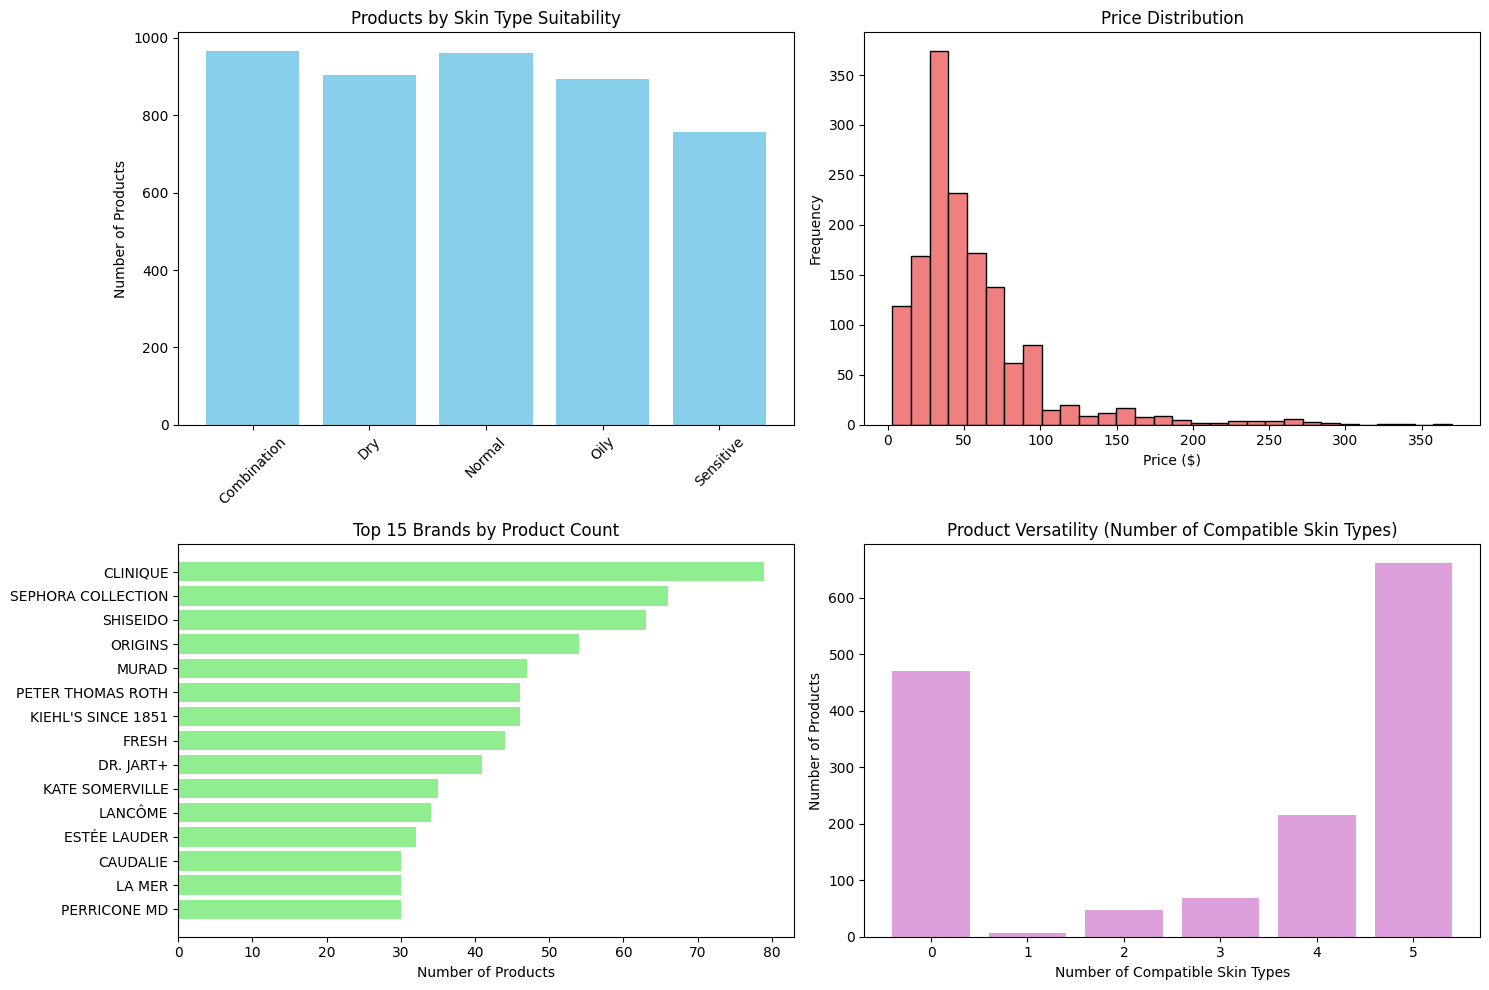


 Sample Ingredient Lists:

Product 1: Crème de la Mer
Ingredients: Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Glob...

Product 2: Facial Treatment Essence
Ingredients: Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid....

Product 3: Protini™ Polypeptide Cream
Ingredients: Water, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, sh-O...


In [ ]:
# Basic info
print("\n Dataset Overview:")
print(df.info())

print("\n First few rows:")
print(df.head())

print("\n Column names:")
print(df.columns.tolist())

# Check for missing values
print("\n Missing values:")
print(df.isnull().sum())

# Skin type distribution
print("\n Skin Type Compatibility Distribution:")
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
for st in skin_types:
    count = df[st].sum()
    percentage = (count / len(df)) * 100
    print(f"  {st:12s}: {count:4d} products ({percentage:.1f}%)")

# Price statistics
print("\n Price Statistics:")
print(df['price'].describe())

# Brand distribution (top 10)
print("\n  Top 10 Brands:")
print(df['brand'].value_counts().head(10))

# Product name length (to understand ingredient complexity)
df['ingredient_length'] = df['ingredients'].str.len()
print("\n Ingredient List Length Statistics:")
print(df['ingredient_length'].describe())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Skin type distribution
ax1 = axes[0, 0]
skin_type_counts = [df[st].sum() for st in skin_types]
ax1.bar(skin_types, skin_type_counts, color='skyblue')
ax1.set_title('Products by Skin Type Suitability')
ax1.set_ylabel('Number of Products')
ax1.tick_params(axis='x', rotation=45)

# 2. Price distribution
ax2 = axes[0, 1]
ax2.hist(df['price'].dropna(), bins=30, color='lightcoral', edgecolor='black')
ax2.set_title('Price Distribution')
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Frequency')

# 3. Products by brand (top 15)
ax3 = axes[1, 0]
top_brands = df['brand'].value_counts().head(15)
ax3.barh(top_brands.index, top_brands.values, color='lightgreen')
ax3.set_title('Top 15 Brands by Product Count')
ax3.set_xlabel('Number of Products')
ax3.invert_yaxis()

# 4. Multi-skin-type products
ax4 = axes[1, 1]
df['num_skin_types'] = df[skin_types].sum(axis=1)
skin_type_versatility = df['num_skin_types'].value_counts().sort_index()
ax4.bar(skin_type_versatility.index, skin_type_versatility.values, color='plum')
ax4.set_title('Product Versatility (Number of Compatible Skin Types)')
ax4.set_xlabel('Number of Compatible Skin Types')
ax4.set_ylabel('Number of Products')

plt.tight_layout()
plt.show()

# Sample ingredients
print("\n Sample Ingredient Lists:")
for i in range(3):
    print(f"\nProduct {i+1}: {df.iloc[i]['name']}")
    print(f"Ingredients: {df.iloc[i]['ingredients'][:200]}...")

**Synthethic Query Generation**

In [ ]:
# Define query components
skin_types_text = ['dry', 'oily', 'combination', 'normal', 'sensitive']
concerns = [
    'acne', 'redness', 'fine lines', 'wrinkles', 'dark spots',
    'hyperpigmentation', 'texture', 'dullness', 'large pores',
    'blackheads', 'uneven tone', 'aging', 'breakouts', 'inflammation'
]
intensities = ['mild', 'occasional', 'severe', 'persistent', 'chronic']
age_concerns = ['anti-aging', 'youthful skin', 'mature skin']

queries = []

# Template 1: Simple skin type queries
print("\n Generating Template 1: Simple skin type queries...")
for skin in skin_types_text:
    queries.append(f"I have {skin} skin")
    queries.append(f"My skin is {skin}")
    queries.append(f"Looking for products for {skin} skin")
    queries.append(f"{skin} skin type")
    queries.append(f"Best products for {skin} skin")

# Template 2: Skin type + single concern
print(" Generating Template 2: Skin type + concern combinations...")
for skin in skin_types_text:
    for concern in concerns:
        queries.append(f"I have {skin} skin with {concern}")
        queries.append(f"{skin} skin and {concern}")
        queries.append(f"Help with {skin} skin and {concern}")

# Template 3:Skin type + multiple concerns
print(" Generating Template 3: Complex multi-concern queries...")
concern_pairs = [
    ('acne', 'redness'),
    ('fine lines', 'wrinkles'),
    ('dark spots', 'hyperpigmentation'),
    ('dullness', 'uneven tone'),
    ('large pores', 'blackheads'),
    ('acne', 'inflammation'),
    ('aging', 'dullness')
]

for skin in skin_types_text:
    for concern1, concern2 in concern_pairs:
        queries.append(f"I have {skin} skin with {concern1} and {concern2}")
        queries.append(f"{skin} skin dealing with {concern1} and {concern2}")

# Template 4: Multiple skin types (common combinations)
print(" Generating Template 4: Multiple skin type combinations...")
multi_skin_combos = [
    ('dry', 'sensitive'),
    ('oily', 'sensitive'),
    ('combination', 'sensitive'),
    ('normal', 'sensitive')
]

for skin1, skin2 in multi_skin_combos:
    queries.append(f"I have {skin1} {skin2} skin")
    queries.append(f"{skin1} and {skin2} skin")
    for concern in concerns[:7]:
        queries.append(f"{skin1} {skin2} skin with {concern}")

# Template 5: Intensity modifiers
print(" Generating Template 5: Queries with intensity modifiers...")
for skin in skin_types_text:
    for intensity in intensities:
        for concern in ['acne', 'redness', 'dryness', 'breakouts']:
            queries.append(f"I have {skin} skin with {intensity} {concern}")

# Template 6: Age-related concerns
print(" Generating Template 6: Age-related concern queries...")
for skin in skin_types_text:
    for age_concern in age_concerns:
        queries.append(f"I have {skin} skin and {age_concern} concerns")
        queries.append(f"{skin} skin with {age_concern}")

# Template 7: Natural language variations
print(" Generating Template 7: Natural language variations...")
natural_templates = [
    "My skin is {} and I struggle with {}",
    "I need help with my {} skin, especially {}",
    "Looking for recommendations for {} skin with {}",
    "What's good for {} skin that has {}",
    "Best routine for {} skin prone to {}",
    "Products for {} skin with {}",
    "{} skin suffering from {}",
    "Dealing with {} on {} skin",
    "My {} skin needs help with {}",
    "Recommendations for {} and {}"
]

for template in natural_templates:
    for skin in skin_types_text:
        for concern in concerns[:10]:
            queries.append(template.format(skin, concern))

# Template 8: Combination concerns (3 concerns)
print(" Generating Template 8: Triple concern combinations...")
concern_triples = [
    ('acne', 'redness', 'inflammation'),
    ('fine lines', 'wrinkles', 'dullness'),
    ('dark spots', 'hyperpigmentation', 'uneven tone'),
    ('large pores', 'blackheads', 'texture'),
    ('dryness', 'redness', 'sensitivity'),
    ('oily', 'acne', 'large pores')
]

for skin in skin_types_text:
    for c1, c2, c3 in concern_triples:
        queries.append(f"I have {skin} skin with {c1}, {c2}, and {c3}")
        queries.append(f"{skin} skin struggling with {c1}, {c2}, and {c3}")

# Template 9: Seasonal and environmental concerns
print(" Generating Template 9: Seasonal and environmental queries...")
environmental = ['winter dryness', 'summer breakouts', 'sun damage', 'pollution damage', 'climate change effects']
for skin in skin_types_text:
    for env in environmental:
        queries.append(f"I have {skin} skin with {env}")
        queries.append(f"{skin} skin affected by {env}")

# Template 10: Goal-oriented queries
print(" Generating Template 10: Goal-oriented queries...")
goals = [
    'clear skin', 'glowing skin', 'smooth texture', 'even tone',
    'hydrated skin', 'plump skin', 'firm skin', 'radiant complexion',
    'minimize pores', 'reduce redness', 'fade dark spots'
]

for skin in skin_types_text:
    for goal in goals:
        queries.append(f"I have {skin} skin and want {goal}")
        queries.append(f"{skin} skin looking for {goal}")

# Template 11: Problem-solution format
print(" Generating Template 11: Problem-solution queries...")
problems = [
    'keeps breaking out', 'always looks dull', 'feels tight and dry',
    'gets oily by midday', 'reacts to everything', 'shows signs of aging',
    'has visible pores', 'is very textured', 'looks uneven'
]

for skin in skin_types_text:
    for problem in problems:
        queries.append(f"My {skin} skin {problem}")

# Template 12: More intensity + concern variations
print(" Generating Template 12: Extended intensity variations...")
for skin in skin_types_text:
    for intensity in intensities:
        for concern in ['dryness', 'oiliness', 'sensitivity', 'texture', 'dark spots']:
            queries.append(f"{skin} skin with {intensity} {concern}")
            queries.append(f"I experience {intensity} {concern} on my {skin} skin")

# Remove duplicates and convert to list
queries = list(set(queries))

print(f"\nGenerated {len(queries)} unique queries!")

# Show sample queries
print("\n Sample Queries (20 random examples):")
sample_queries = np.random.choice(queries, 20, replace=False)
for i, query in enumerate(sample_queries, 1):
    print(f"  {i:2d}. {query}")

# Analyze query distribution
print("\n Query Analysis:")

# Count queries per skin type
skin_type_in_queries = {skin: 0 for skin in skin_types_text}
for query in queries:
    for skin in skin_types_text:
        if skin in query.lower():
            skin_type_in_queries[skin] += 1

print("\nQueries per skin type:")
for skin, count in skin_type_in_queries.items():
    print(f"  {skin:12s}: {count:4d} queries")

# Count queries per concern
concern_in_queries = {concern: 0 for concern in concerns}
for query in queries:
    for concern in concerns:
        if concern in query.lower():
            concern_in_queries[concern] += 1

print("\nTop 10 concerns in queries:")
sorted_concerns = sorted(concern_in_queries.items(), key=lambda x: x[1], reverse=True)[:10]
for concern, count in sorted_concerns:
    print(f"  {concern:20s}: {count:4d} queries")

# Save queries to file (both local and Google Drive)
queries_df = pd.DataFrame({'query': queries})

# Save to Colab's temporary storage
queries_df.to_csv('synthetic_queries.csv', index=False)
print(f"\n Saved {len(queries)} queries to 'synthetic_queries.csv' (Colab storage)")

# Save to Google Drive
try:
    queries_df.to_csv('/content/drive/MyDrive/synthetic_queries.csv', index=False)
    print(f" Saved {len(queries)} queries to Google Drive: 'MyDrive/synthetic_queries.csv'")
except:
    print("  Could not save to Google Drive. Download from Colab file browser instead.")


STEP 3: SYNTHETIC QUERY GENERATION

 Generating Template 1: Simple skin type queries...
 Generating Template 2: Skin type + concern combinations...
 Generating Template 3: Complex multi-concern queries...
 Generating Template 4: Multiple skin type combinations...
 Generating Template 5: Queries with intensity modifiers...
 Generating Template 6: Age-related concern queries...
 Generating Template 7: Natural language variations...
 Generating Template 8: Triple concern combinations...
 Generating Template 9: Seasonal and environmental queries...
 Generating Template 10: Goal-oriented queries...
 Generating Template 11: Problem-solution queries...
 Generating Template 12: Extended intensity variations...

✓ Generated 1486 unique queries!

 Sample Queries (20 random examples):
   1. I have sensitive skin with acne, redness, and inflammation
   2. Recommendations for dry and blackheads
   3. I need help with my dry skin, especially fine lines
   4. I have combination skin with chronic bre

**Realistic / Messy Query Generation**

In [ ]:
import random
import re

# Store your existing structured queries
structured_queries = queries.copy()
print(f"Starting with {len(structured_queries)} structured queries")

# Define realistic query components
realistic_queries = []


STEP 3 - PART 2: ADDING REALISTIC MESSY QUERIES
📊 Starting with 1486 structured queries


  Template Set 1: Conversational & Messy Template

In [ ]:
print("\nGenerating realistic conversational queries...")

conversational_templates = [
    "my skin is so {} help",
    "why is my skin always {}",
    "how do i fix {} skin",
    "what can i do about my {} skin",
    "my face keeps getting {}",
    "dealing with {} rn",
    "anyone else have {} skin",
    "is it normal to have {}",
    "cant deal with this {} anymore",
    "my skin has been {} lately",
    "struggling with {} skin help plz",
    "why does my skin look so {}",
    "how to treat {} skin",
    "what helps with {}",
    "tired of my {} skin"
]

messy_concerns = [
    'dry', 'oily', 'red', 'flaky', 'irritated', 'dull', 'bumpy',
    'breaking out', 'patchy', 'rough', 'shiny', 'tight', 'greasy',
    'sensitive', 'reactive', 'acne prone', 'spotty'
]

for template in conversational_templates:
    for concern in messy_concerns:
        realistic_queries.append(template.format(concern))


📝 Generating realistic conversational queries...


Template Set 2: Questions & Confusion

In [ ]:
print("Generating question-based queries...")

question_templates = [
    "why do i have {} and {}",
    "is {} and {} the same thing",
    "can you have {} and {} at the same time",
    "what causes {} on {} skin",
    "how to know if i have {}",
    "am i {} or {}",
    "whats the difference between {} and {}",
    "do i need help with {} or {}",
    "is my skin {} or just {}"
]

for _ in range(50):
    template = random.choice(question_templates)
    c1, c2 = random.sample(messy_concerns, 2)
    realistic_queries.append(template.format(c1, c2))

📝 Generating question-based queries...



Template Set 3: Sympton-focused (No skin type mentioned)

In [ ]:
print("Generating symptom-focused queries...")

symptom_queries = [
    "my forehead is always oily",
    "my cheeks are dry but my nose is oily",
    "i get breakouts on my chin",
    "redness around my nose",
    "dark spots on my face",
    "texture on my cheeks",
    "fine lines under my eyes",
    "my skin feels tight after washing",
    "my face gets shiny by noon",
    "i have large pores on my nose",
    "blackheads all over",
    "my skin looks dull and tired",
    "uneven skin tone",
    "my face reacts to everything",
    "hormonal acne on jawline",
    "forehead bumps wont go away",
    "skin peeling around mouth",
    "red patches on cheeks",
    "rough texture everywhere",
    "cant get rid of these dark circles"
]

realistic_queries.extend(symptom_queries)

📝 Generating symptom-focused queries...


Template Set 4: Long Ramblin Queries (Real user style)

In [ ]:
print("Generating long descriptive queries...")

long_queries = [
    "so my skin is kinda dry but i also break out sometimes especially on my chin and i dont know what to use",
    "i have combination skin i think like my tzone gets oily but my cheeks are dry and red",
    "my face is so sensitive everything makes it red and irritated idk what products are safe",
    "i used to have clear skin but now im getting acne and dark spots and im not sure if its hormonal or what",
    "my skin looks dull and tired all the time even when i sleep enough what can help with that",
    "i have these bumps on my forehead that wont go away and my skin texture is really rough",
    "oily skin but also dehydrated i think because it feels tight sometimes but looks shiny",
    "breaking out around my period and getting dark marks after they heal",
    "my skin is aging i guess fine lines and wrinkles starting to show need help",
    "very dry flaky skin especially in winter and nothing seems to help",
    "large pores and blackheads on my nose and chin how do i fix this",
    "my face gets red so easily and i dont know if its rosacea or just sensitive skin",
    "acne scars and hyperpigmentation from old breakouts want to fade them",
    "my skin was fine but now its getting worse idk if its stress or products",
    "combination of issues like acne redness texture uneven tone need a full routine",
    "sensitive skin that breaks out easily but also gets dry what do i even do",
    "oily tzone but dry everywhere else and occasional breakouts help",
    "my skin looks so dull and tired want it to glow somehow",
    "aging skin with fine lines wrinkles and dark spots starting to panic",
    "teen acne all over face especially forehead and cheeks need something gentle",
    "adult acne suddenly appeared in my 30s never had this before",
    "pregnancy made my skin crazy oily and breaking out everywhere",
    "male here oily skin large pores blackheads what products work for guys",
    "darker skin tone concerned about hyperpigmentation and uneven tone",
    "menopause skin changes dry sensitive and showing more wrinkles"
]

realistic_queries.extend(long_queries)

📝 Generating long descriptive queries...


Template Set 5: Short Casual Queries

In [ ]:
print("Generating short casual queries...")

short_queries = [
    "dry skin help",
    "oily skin products",
    "acne",
    "redness",
    "anti aging",
    "sensitive skin",
    "dark spots",
    "large pores",
    "texture issues",
    "combination skin",
    "breakouts",
    "dull skin",
    "flaky skin",
    "shiny face",
    "rough texture",
    "uneven tone",
    "fine lines",
    "blackheads",
    "irritated skin",
    "tight skin"
]

realistic_queries.extend(short_queries)

📝 Generating short casual queries...


Template Set 6: Product/Ingredient focused

In [ ]:
print("Generating product-focused queries...")

product_queries = [
    "best products for oily skin",
    "what ingredients help with acne",
    "retinol for dry skin",
    "vitamin c for dark spots",
    "hyaluronic acid",
    "niacinamide for oily skin",
    "what cleanser for sensitive skin",
    "moisturizer for combination skin",
    "sunscreen for acne prone",
    "serum for aging skin",
    "chemical exfoliant",
    "gentle products for redness",
    "products that wont clog pores",
    "fragrance free for sensitive",
    "oil free moisturizer",
    "what helps with texture",
    "brightening products",
    "pore minimizing",
    "hydrating but not greasy",
    "products for hormonal acne"
]

realistic_queries.extend(product_queries)

📝 Generating product-focused queries...


Template Set 7: Demographic-specific

In [ ]:
print("Generating demographic-specific queries...")

demographic_queries = [
    # Age-related
    "teenager with acne all over face",
    "early 20s oily skin with breakouts",
    "30s starting to see fine lines",
    "40s aging skin concerns",
    "mature skin 50+ dry and wrinkled",

    # Gender-specific
    "mens skincare oily skin",
    "male with sensitive skin",
    "skincare for guys with acne",

    # Life stage
    "pregnancy acne and oiliness",
    "postpartum skin issues",
    "hormonal acne in 20s",
    "menopausal skin changes",

    # Skin tone
    "dark skin hyperpigmentation",
    "darker skin tone dark spots",
    "melanin rich skin uneven tone",
    "products for brown skin",

    # Specific conditions
    "eczema prone sensitive skin",
    "rosacea redness flare ups",
    "perioral dermatitis",
    "fungal acne safe products"
]

realistic_queries.extend(demographic_queries)

📝 Generating demographic-specific queries...


Combine & Analyze


📊 Combining structured and realistic queries...

✅ FINAL QUERY STATISTICS:
  Structured queries: 1,486
  Realistic queries:  409
  Total unique:       1,895
  Realistic ratio:    21.6%

📋 COMPARISON - Structured vs Realistic:

🔷 Structured Examples:
  • Products for sensitive skin with dullness
  • I experience persistent texture on my combination skin
  • I have combination skin and anti-aging concerns
  • My combination skin is very textured
  • combination skin with chronic sensitivity

🔶 Realistic Examples:
  • dealing with red rn
  • what helps with breaking out
  • chemical exfoliant
  • my skin has been oily lately
  • what can i do about my irritated skin

📏 Query Length Analysis:
  Structured - Avg: 6.9 words, Range: 3-11
  Realistic  - Avg: 6.1 words, Range: 1-23

💾 Saved 1895 queries to 'synthetic_queries_enhanced.csv'
💾 Saved to Google Drive: 'MyDrive/synthetic_queries_enhanced.csv'


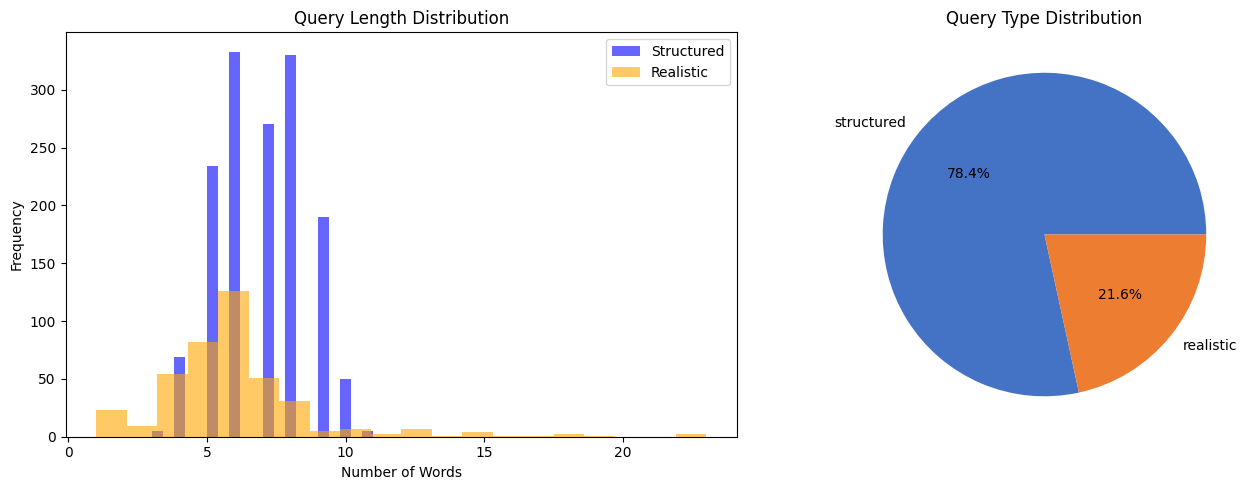


✅ ENHANCED QUERY GENERATION COMPLETE!

💡 KEY IMPROVEMENTS:
  ✓ Mixed structured + realistic queries
  ✓ Conversational language & questions
  ✓ Varied query lengths (short & long)
  ✓ Symptom-focused (no explicit skin type)
  ✓ Demographic diversity
  ✓ Typos & casual language
  ✓ Product/ingredient focused queries

🎯 Your model will now be robust to real-world user input!


In [ ]:
print("\nCombining structured and realistic queries...")

# Remove duplicates from realistic queries
realistic_queries = list(set(realistic_queries))

# Combine both sets
all_queries = structured_queries + realistic_queries
all_queries = list(set(all_queries))  # Remove any duplicates

print(f"\nFINAL QUERY STATISTICS:")
print(f"  Structured queries: {len(structured_queries):,}")
print(f"  Realistic queries:  {len(realistic_queries):,}")
print(f"  Total unique:       {len(all_queries):,}")
print(f"  Realistic ratio:    {len(realistic_queries)/len(all_queries)*100:.1f}%")

# Sample comparison
print("\nCOMPARISON - Structured vs Realistic:")
print("\nStructured Examples:")
for q in random.sample(structured_queries, 5):
    print(f"  • {q}")

print("\nRealistic Examples:")
for q in random.sample(realistic_queries, 5):
    print(f"  • {q}")

# Length distribution
structured_lengths = [len(q.split()) for q in structured_queries]
realistic_lengths = [len(q.split()) for q in realistic_queries]

print("\nQuery Length Analysis:")
print(f"  Structured - Avg: {np.mean(structured_lengths):.1f} words, Range: {min(structured_lengths)}-{max(structured_lengths)}")
print(f"  Realistic  - Avg: {np.mean(realistic_lengths):.1f} words, Range: {min(realistic_lengths)}-{max(realistic_lengths)}")

# Save combined dataset
combined_df = pd.DataFrame({
    'query': all_queries,
    'type': ['structured' if q in structured_queries else 'realistic' for q in all_queries]
})

# Save to both locations
combined_df.to_csv('synthetic_queries_enhanced.csv', index=False)
print(f"\nSaved {len(all_queries)} queries to 'synthetic_queries_enhanced.csv'")

try:
    combined_df.to_csv('/content/drive/MyDrive/synthetic_queries_enhanced.csv', index=False)
    print(f"Saved to Google Drive: 'MyDrive/synthetic_queries_enhanced.csv'")
except:
    print("Could not save to Google Drive. Download from Colab file browser instead.")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Query length distribution
axes[0].hist(structured_lengths, bins=20, alpha=0.6, label='Structured', color='blue')
axes[0].hist(realistic_lengths, bins=20, alpha=0.6, label='Realistic', color='orange')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Query Length Distribution')
axes[0].legend()

# Query type pie chart
type_counts = combined_df['type'].value_counts()
axes[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#4472C4', '#ED7D31'])
axes[1].set_title('Query Type Distribution')

plt.tight_layout()
plt.show()